## Image recognition classifier: Determine house numbers displayed in images from Google Street using the Random Forrest Classifier.

### Introduction:

This notebook determines the numbers displayed in images using the Random Forest Classifier. The data is imported and loaded from SKLearn. After preprocessing, the RandomForestClassifier is trained to determine numbers in images. The model is trained using various estimator values and the optimal estimator value is found. A confusion matrix is plotted from which we can see which numbers were most problematic to identify. The metrics of the model are also determined.

### Load and View Data:

In [20]:
# Import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_digits

digits = load_digits()

#### Get the image data shape and number of labels.

In [21]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


#### Plot the first 5 samples of the digits dataset.

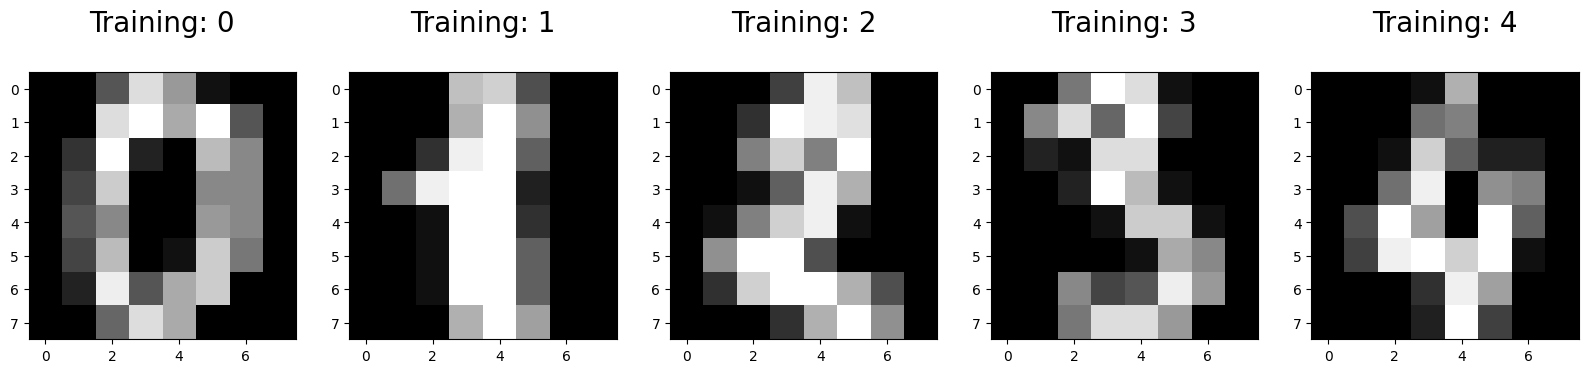

In [22]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Split the Data:

In [23]:
# Get the independent and dependent variables
# Convert labels to string values
# Reference (See Section 4):
# https://medium.com/analytics-vidhya/hello-world-of-computer-vision-mnist-handwritten-digit-classification-a5c28f6276e1
X, y = digits.data.astype(np.uint8), digits.target.astype(np.uint8)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We train the model on a large subset of the data known as the train set.
# The model is then tested on the remaining data, known as the test set,
# in order to evaluate the model's performance on known data that the model
# has not seen.
# The predictions of the model on the test set are compared to that of the known
# values of the test set in order to determine how well the model performs.

### Train the Model:

We use the RandomForestClassifier method

In [24]:
# Create a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

We are going to tune the number of estimators. This is because Random Forests are less prone to overfitting, so we can choose a higher number of trees for better performance. We tune the parameter using GridSearchCV.

In [25]:
# Reference for parameter tuning:
# https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/

# Define the parameter grid for GridSearchCV
n_estimators = list(np.linspace(50, 300, 11, dtype=int))
param_grid = {'n_estimators': n_estimators}

# Create GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters found by GridSearchCV
print("\nBest Parameters:", best_params)


Best Parameters: {'n_estimators': 200}


Using GridSearchCV we find the best parameter value for the number of estimators is 200. We will thus use the model associated with this parameter value when testing our model on the test data.

### Get Predictions and Matrics:

#### Predict on the test set.

In [26]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

#### Create a confusion matrix of the predictions.

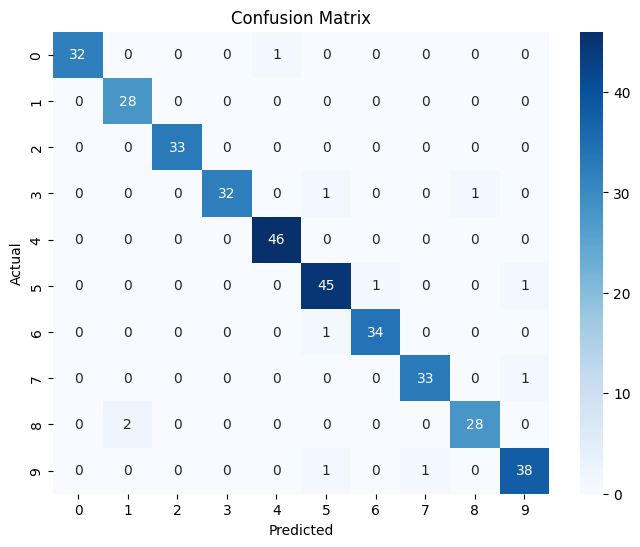

In [27]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

From the confusion matrix we can see that the model did very well overall. The numbers 0, 6 and 7 were each predicted wrong only once each. Numbers 3, 5, 8 and 9 were each only predicted wrong twice and numbers 1, 2 and 4 were predicted correctly each time.

#### Find and print the metrics of the model.

In [28]:
# Find accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print metrics
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9694444444444444
Precision: 0.9707090785690651
Recall: 0.9693670388851865
F1-Score: 0.9697614677667822


Overall the model performs very well with all metrics at around 0.97.